# Linear Regression

## From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# generate values from 0 to 30 with 0.27 increment
X = np.arange(0,30,0.27)

# view the first 3 values
print(X[:4])

# generate y = mx+c
y = 0.1999*X + 4.2999

# view the first 4 values from y
print(y[:4])

# view the shape of x and y
print(X.shape)
print(y.shape)

[0.   0.27 0.54 0.81]
[4.2999   4.353873 4.407846 4.461819]
(112,)
(112,)


In [12]:
split = int(X.shape[0] * 0.8)
print(split)

89


In [15]:
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [16]:
def plot_data(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, predictions=None):
    plt.scatter(X_train, y_train, c='b', label="Training Data")
    plt.scatter(X_test, y_test, c='r', label="Test Data")

    if predictions is not None:
        plt.plot(X_test, predictions, c="g", label="Predictions")
    
    plt.legend()
    plt.title("X vs Y")
    plt.show()

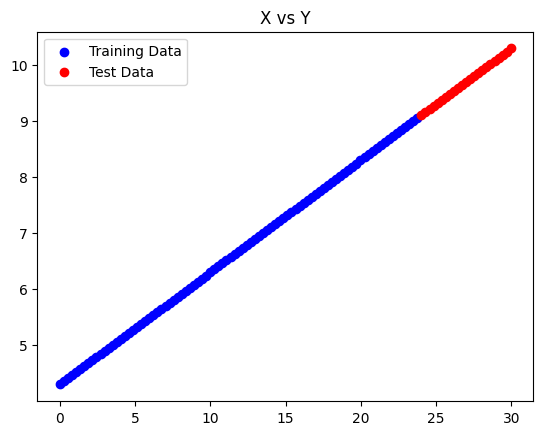

In [17]:
plot_data()

In [24]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

cov_x_y = np.sum((X_train - X_mean) * (y_train - y_mean))/X_train.shape[0]
cov_x = np.sum(np.square(X_train - X_mean))/X_train.shape[0]

m = cov_x_y/cov_x

c = y_mean - m * X_mean

print(f'y={m}*X + {c}')


y=0.1999*X + 4.2999


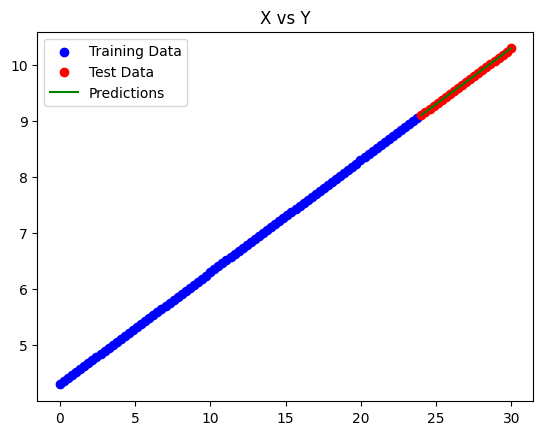

In [26]:
# Getting the prediction on the test set
y_preds = m * X_test + c

plot_data(predictions=y_preds)

## Using Scikit-Learn

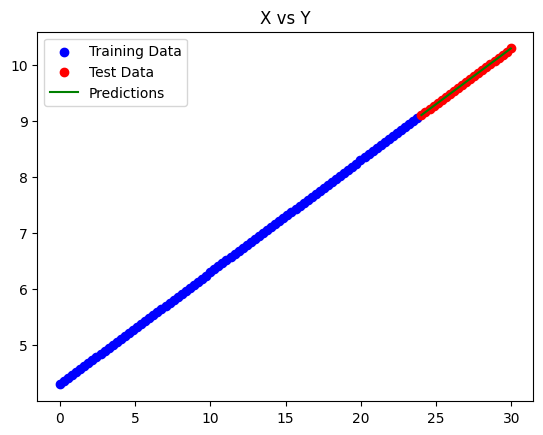

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

#Train
lr_model.fit(X_train.reshape(-1,1), y_train)
# Get Predictions
y_preds = lr_model.predict(X_test.reshape(-1, 1))

# Plot
plot_data(predictions = y_preds)

## Using Statsmodel

In [33]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# view the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.015e+31
Date:                Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:20:41   Log-Likelihood:                 2884.2
No. Observations:                  89   AIC:                            -5764.
Df Residuals:                      87   BIC:                            -5759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2999   4.34e-16   9.91e+15      0.000       4.300       4.300
x1             0.1999   3.15e-17   6.34e+15      0.000       0.200       0.200
==============================================================================
Omnibus:                        8.568   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.982
Skew:                           0.778   Prob(JB):                       0.0112
Kurtosis:                       2.973   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
import pandas as pd

X1 = np.arange(10, 30, 0.27)
X2 = np.arange(50, 70, 0.27)
y = 1.123 * X1 + 2.123*X2 + 3.123

df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
X_data = df.drop(columns=['y'])
y_data = df['y']

In [36]:
X_data

,X1,X2
0,10.00,50.00
1,10.27,50.27
2,10.54,50.54
3,10.81,50.81
4,11.08,51.08
...,...,...
70,28.90,68.90
71,29.17,69.17
72,29.44,69.44
73,29.71,69.71


In [44]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# view the summary
print(model.summary())

# get the predictions
y_preds = model.predict(X_test_sm)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.327e+31
Date:                Tue, 10 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:30:59   Log-Likelihood:                 1803.2
No. Observations:                  60   AIC:                            -3602.
Df Residuals:                      58   BIC:                            -3598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0289    2.5e-17   1.15e+15      0.0

In [45]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_preds))

1.0
